<h1>Ozone Level Detection using KNN, SVM and Random Forest</h1>
   <p> We will be using Python with some required libraries such as numpy, pandas, matplotlib and sklearn to load,preprocess the data and to train, test and evaluate our machine learning models .
we will use knn, svm and random forest algorithms for training our models.
Firstly we need to import all the required libraries.<p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn import metrics

Now the dataset is imported and analysed

In [2]:
data = pd.read_csv("eighthr_data.csv",header=None)
print(data.head())
print(data.shape)

         0    1    2    3    4    5    6    7    8    9  ...     64     65  \
0  1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9 ...   0.15  10.67   
1  1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1 ...   0.48   8.39   
2  1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2 ...    0.6   6.94   
3  1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4 ...   0.49   8.73   
4  1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3 ...      ?      ?   

      66    67     68    69     70   71    72   73  
0  -1.56  5795  -12.1  17.9  10330  -55     0  0.0  
1   3.84  5805  14.05    29  10275  -55     0  0.0  
2    9.8  5790   17.9  41.3  10235  -40     0  0.0  
3  10.54  5775  31.15  51.7  10195  -40  2.08  0.0  
4      ?     ?      ?     ?      ?    ?  0.58  0.0  

[5 rows x 74 columns]
(2534, 74)


Next The features ad labels are extracted from the dataset and preprocessed

In [3]:
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [4]:
y = y.astype(int)
x = x.replace("?",np.nan)
x = x.apply(pd.to_numeric)
x = x.where(pd.notna(x), x.mean(), axis='columns')

The data is splited into training data ad testing data

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 200)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1773, 72)
(761, 72)
(1773,)
(761,)


<h3>K Nearest Neighours Algorithm</h3>
<p>Firstly the suitable k is selected for the model.</p>

In [6]:
scores = {}
scoreL = []
k = 0
maxAcc = 0
for i in range(1,50):
    knn = KNN(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    scores[i] = acc
    scoreL.append(acc)
    if acc > maxAcc:
        maxAcc = acc
        k = i
print("k =",k,"\naccuracy = ",maxAcc)

k = 11 
accuracy =  0.9461235216819974


Text(0,0.5,'testing accuracy')

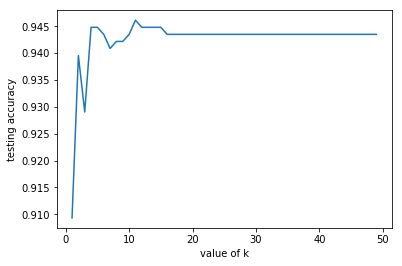

In [7]:
plt.plot(range(1,50),scoreL)
plt.xlabel("value of k")
plt.ylabel("testing accuracy")

Since we have found the suitable k, we will train our model.

In [8]:
knn = KNN(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)


The Model is Evalueted

In [9]:
print("accuracy = ",metrics.accuracy_score(y_test,y_pred_knn))
print("cofusion matrix -> ","\n",metrics.confusion_matrix(y_test,y_pred_knn))
print(metrics.classification_report(y_test,y_pred_knn))

accuracy =  0.9461235216819974
cofusion matrix ->  
 [[718   0]
 [ 41   2]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       718
          1       1.00      0.05      0.09        43

avg / total       0.95      0.95      0.92       761



<h3>SVM Algorithm</h3>
<p>Firstly the module is imported and the model is trained.</p>

In [10]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'poly',degree=2)
svclassifier.fit(x_train,y_train)
y_pred_svm = svclassifier.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_svm))

0.9461235216819974


The model is evalueted now

In [11]:
print(metrics.confusion_matrix(y_test,y_pred_svm))
print(metrics.classification_report(y_test,y_pred_svm))

[[709   9]
 [ 32  11]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       718
          1       0.55      0.26      0.35        43

avg / total       0.93      0.95      0.94       761



<h3>Random Forest Algorithm</h3>
<p>First the module is imported and then the model is trained and evalueted</p>

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(x_train,y_train)
y_pred_rfc = clf.predict(x_test)
print("accuracy = ",metrics.accuracy_score(y_test,y_pred_rfc))
print("confusion matrix = \n",metrics.confusion_matrix(y_test,y_pred_rfc))
print(metrics.classification_report(y_test,y_pred_rfc))

accuracy =  0.9500657030223391
confusion matrix = 
 [[713   5]
 [ 33  10]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.97       718
          1       0.67      0.23      0.34        43

avg / total       0.94      0.95      0.94       761



<h2>Comparison</h2>
<p>After comparing the reports we can pick the Random Forest Algorithm as the most suitale algorithm for this data.
Since the data is skewed, knn could not generalise the data well while svm and radom forest algorithm has doe a good job in generalising. That is why svm and radom forest got a better f1 score than the knn algorithm. Since the Random Forest algorithm has a etter accuracy score, we chose this algorithm as the most suitale for this dataset .</p>